<a href="https://colab.research.google.com/github/rosihirales/IO-LITI/blob/main/Ejemplo_M%C3%A9todo_M_o_de_Penalizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Método de la Gran M o Penalización


Este notebook explica el Método de la Gran M o de Penalización, utilizado en la Programación Lineal para resolver problemas con restricciones de desigualdad y variables artificiales.


## ¿Qué es el Método de la Gran M o Penalización?
El Método de la Gran M es una técnica en Programación Lineal que permite resolver problemas de optimización con restricciones de desigualdad (≥ o ≤). La "M" representa un valor muy grande, que actúa como una penalización para forzar las variables artificiales a ser cero en la solución óptima.

### Pasos principales:
1. **Formulación del problema**: Convertir las restricciones de desigualdad en igualdad agregando variables de holgura o excedente.
2. **Introducción de variables artificiales**: Para restricciones de igualdad o de ≥, agregamos variables artificiales.
3. **Asignación de la penalización**: En la función objetivo, asignamos un coeficiente de penalización "M" a las variables artificiales.
4. **Aplicación del Método Simplex**: El problema se resuelve usando el método Simplex tradicional, pero incluyendo las penalizaciones.



Ejemplo:

Maximizar 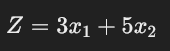

Suejto a : 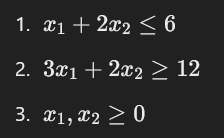

Paso 1. Convertir las restricciones en igualdades


 Primera restricción:

 La primera restricción es una desigualdad ≤, por lo que agregamos una variable de holgura s1:

imagen.png

(se añade una variable artificial A1​ y una variable de exceso s2​).

Segunda restricción:
La segunda restricción es una desigualdad ≥, por lo que agregamos una variable artificial A1​ y una variable de excedente s2:

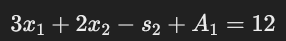

La función objetivo se penaliza al agregar la variable artificial con el valor de M.

Maximizar:

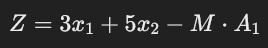



##Explicación del Código:

1. Definición del problema:
* Los coeficientes de la función objetivo son c=[3,5,0,0,−M], donde el -M penaliza la variable artificial.

* La matriz AA contiene las restricciones, incluida la variable de holgura s1, la variable de excedente s2​ y la variable artificial A1.

* El vector b=[6,12] contiene los valores en el lado derecho de las restricciones.

2. Proceso Simplex:

* Elegimos la columna pivote (variable entrante) como la columna con el valor más negativo en la fila de la función objetivo.
* Calculamos el índice de la fila pivote dividiendo los términos de la columna de soluciones entre los de la columna pivote (ignorando valores negativos).
* Normalizamos la fila pivote y actualizamos las demás filas.

3. Iteraciones: El proceso se repite hasta que no haya más valores negativos en la fila de la función objetivo, lo que indica que hemos alcanzado la solución óptima.


In [16]:
import numpy as np

# Definimos una función para imprimir la tabla simplex en cada iteración
def print_tableau(tableau):
    print("Tabla Simplex:")
    for row in tableau:
        print("\t".join([f"{x:.2f}" for x in row]))
    print()

# Método Simplex con Gran M
def simplex_gran_m(c, A, b, M_value):
    """
    Implementación del método simplex con la Gran M.
    c: coeficientes de la función objetivo penalizada (incluye -M para variables artificiales)
    A: matriz de restricciones (incluye variables artificiales)
    b: valores del lado derecho de las restricciones
    M_value: valor de M (un número muy grande)
    """
    num_vars = len(c)  # Número total de variables (x1, x2, s1, s2, A1)

    # Crear la tabla inicial (Aumentamos con Z row y b)
    tableau = np.zeros((A.shape[0] + 1, A.shape[1] + 1))
    tableau[:-1, :-1] = A
    tableau[:-1, -1] = b
    tableau[-1, :-1] = -c  # Los coeficientes de la función objetivo, con M penalizado

    print("Tabla inicial:")
    print_tableau(tableau)

    # Proceso iterativo del Método Simplex
    while np.min(tableau[-1, :-1]) < 0:
        # Elegir columna pivote (variable entrante)
        pivot_col = np.argmin(tableau[-1, :-1])

        # Verificamos cuál es la fila pivote
        ratios = tableau[:-1, -1] / tableau[:-1, pivot_col]
        valid_ratios = [ratio if ratio > 0 else float('inf') for ratio in ratios]
        pivot_row = np.argmin(valid_ratios)

        # Pivote
        pivot_element = tableau[pivot_row, pivot_col]
        tableau[pivot_row, :] /= pivot_element

        # Actualización del resto de las filas
        for i in range(tableau.shape[0]):
            if i != pivot_row:
                tableau[i, :] -= tableau[i, pivot_col] * tableau[pivot_row, :]

        print(f"Iteración (Columna pivote: {pivot_col}, Fila pivote: {pivot_row}):")
        print_tableau(tableau)

    # Retornar el valor óptimo de la función objetivo y las variables
    solution = tableau[:-1, -1]
    Z_opt = tableau[-1, -1]
    return solution, Z_opt

# Definimos el problema
# Coeficientes de la función objetivo penalizada (incluye -M para A1)
c = np.array([3, 5, 0, 0, -1e6])

# Matriz de restricciones
A = np.array([
    [1, 2, 1, 0, 0],  # x1 + 2x2 + s1 = 6
    [3, 2, 0, -1, 1]  # 3x1 + 2x2 - s2 + A1 = 12
])

# Lado derecho de las restricciones
b = np.array([6, 12])

# Valor de M (un número muy grande)
M_value = 1e6

# Ejecutamos el método simplex con la Gran M
solution, Z_opt = simplex_gran_m(c, A, b, M_value)

# Mostramos la solución
print("Solución óptima:")
print(f"Variables de decisión: {solution[:-1]}")  # Excluimos la variable artificial
print(f"Valor óptimo de Z: {Z_opt}")


Tabla inicial:
Tabla Simplex:
1.00	2.00	1.00	0.00	0.00	6.00
3.00	2.00	0.00	-1.00	1.00	12.00
-3.00	-5.00	-0.00	-0.00	1000000.00	0.00

Iteración (Columna pivote: 1, Fila pivote: 0):
Tabla Simplex:
0.50	1.00	0.50	0.00	0.00	3.00
2.00	0.00	-1.00	-1.00	1.00	6.00
-0.50	0.00	2.50	0.00	1000000.00	15.00

Iteración (Columna pivote: 0, Fila pivote: 1):
Tabla Simplex:
0.00	1.00	0.75	0.25	-0.25	1.50
1.00	0.00	-0.50	-0.50	0.50	3.00
0.00	0.00	2.25	-0.25	1000000.25	16.50

Iteración (Columna pivote: 3, Fila pivote: 0):
Tabla Simplex:
0.00	4.00	3.00	1.00	-1.00	6.00
1.00	2.00	1.00	0.00	0.00	6.00
0.00	1.00	3.00	0.00	1000000.00	18.00

Solución óptima:
Variables de decisión: [6.]
Valor óptimo de Z: 18.0


## Resultado:


Variables de decisión: x1=6 y x2​=0 es la solución que maximiza la función objetivo.

Esto es coherente con las restricciones del problema, porque:

* Si x1=6, entonces en la primera restricción x1+2x2=6 se cumple perfectamente.
* En la segunda restricción, si x1=6 y x2=0, entonces 3x1+2x2=18, lo cual es mayor que 12, por lo que también se cumple.


#Valor óptimo de la función objetivo: Z=18

*Si sustituimos x1=6 y x2=0 en la función objetivo Z=3x1+5x2, obtenemos Z=3(6)+5(0)=18, que es el valor máximo alcanzable para este problema dadas las restricciones.